<a href="https://colab.research.google.com/github/tanriders/Traveling-Salesman-Problem/blob/main/DS_Transportation_TSP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

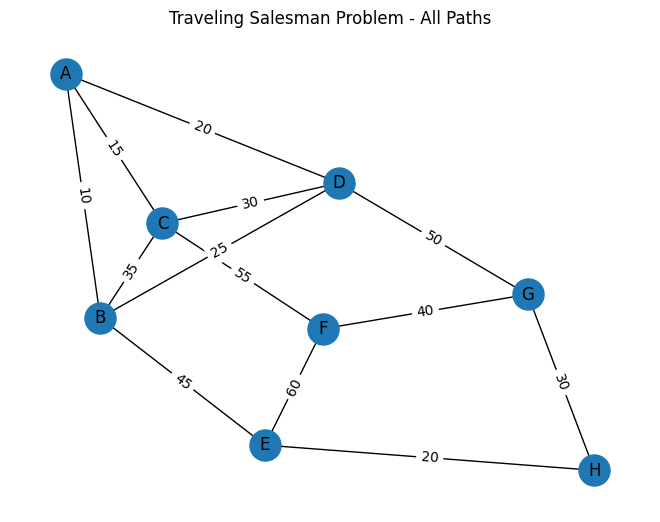

In [ ]:
# ข้อมูลระยะทางระหว่างเมือง
distance_matrix = {
    ('A', 'B'): 10,
    ('A', 'C'): 15,
    ('A', 'D'): 20,
    ('B', 'C'): 35,
    ('B', 'D'): 25,
    ('C', 'D'): 30,
    ('B', 'E'): 45,
    ('C', 'F'): 55,
    ('D', 'G'): 50,
    ('E', 'F'): 60,
    ('F', 'G'): 40,
    ('G', 'H'): 30,
    ('H', 'E'): 20
}

# สร้างกราฟ
G = nx.Graph()
G.add_weighted_edges_from([(city1, city2, distance) for (city1, city2), distance in distance_matrix.items()])

# แสดงกราฟเส้นทางทั้งหมด
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=500)
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Traveling Salesman Problem - All Paths")
plt.show()

In [ ]:

# ใช้ Nearest Neighbor Algorithm ในการหาเส้นทาง TSP
def nearest_neighbor_algorithm(graph, start_node):
    tour = [start_node]
    current_node = start_node
    total_distance = 0;

    while len(tour) < len(graph.nodes):
        nearest_neighbor = None
        min_distance = float('inf')

        for neighbor in graph.neighbors(current_node):
            print("neighbor: ",neighbor)
            if neighbor not in tour:
                distance = graph[current_node][neighbor]['weight']

                print("Dis_neighbor: ",distance)
                if distance < min_distance:
                    min_distance = distance
                    nearest_neighbor = neighbor

                    print("nearest_neighbor: ",nearest_neighbor)
                    print("min_distance: ",min_distance)
                    #print("total_distance: ",total_distance)
                print("เส้นทาง TSP:", tour)



        if nearest_neighbor is not None:
            tour.append(nearest_neighbor)
            current_node = nearest_neighbor
            total_distance += min_distance
            print("total_distance: ",total_distance)


    tour.append(start_node)


    return tour

# เริ่มต้นที่ A
start_node = 'A'

# หาเส้นทาง TSP ด้วย Nearest Neighbor Algorithm
tsp_tour = nearest_neighbor_algorithm(G, start_node)

# แสดงเส้นทาง TSP
print("เส้นทาง TSP:", tsp_tour)


neighbor:  B
Dis_neighbor:  10
nearest_neighbor:  B
min_distance:  10
เส้นทาง TSP: ['A']
neighbor:  C
Dis_neighbor:  15
เส้นทาง TSP: ['A']
neighbor:  D
Dis_neighbor:  20
เส้นทาง TSP: ['A']
total_distance:  10
neighbor:  A
neighbor:  C
Dis_neighbor:  35
nearest_neighbor:  C
min_distance:  35
เส้นทาง TSP: ['A', 'B']
neighbor:  D
Dis_neighbor:  25
nearest_neighbor:  D
min_distance:  25
เส้นทาง TSP: ['A', 'B']
neighbor:  E
Dis_neighbor:  45
เส้นทาง TSP: ['A', 'B']
total_distance:  35
neighbor:  A
neighbor:  B
neighbor:  C
Dis_neighbor:  30
nearest_neighbor:  C
min_distance:  30
เส้นทาง TSP: ['A', 'B', 'D']
neighbor:  G
Dis_neighbor:  50
เส้นทาง TSP: ['A', 'B', 'D']
total_distance:  65
neighbor:  A
neighbor:  B
neighbor:  D
neighbor:  F
Dis_neighbor:  55
nearest_neighbor:  F
min_distance:  55
เส้นทาง TSP: ['A', 'B', 'D', 'C']
total_distance:  120
neighbor:  C
neighbor:  E
Dis_neighbor:  60
nearest_neighbor:  E
min_distance:  60
เส้นทาง TSP: ['A', 'B', 'D', 'C', 'F']
neighbor:  G
Dis_neighbo

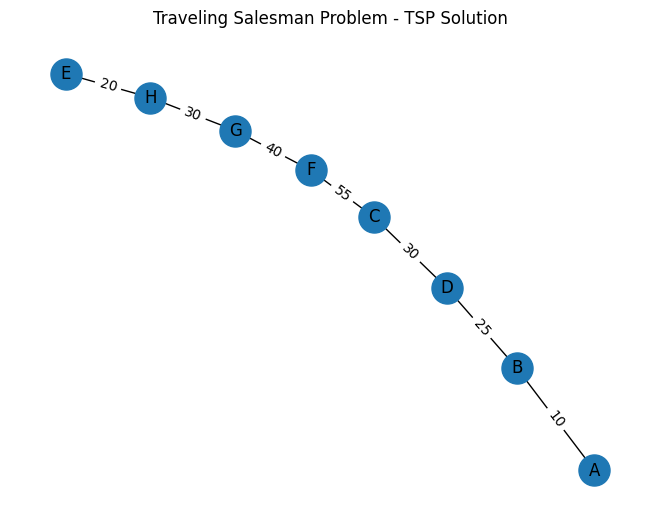

In [ ]:

# แสดงกราฟเส้นทางเป็นคำตอบ
tsp_edges = [(tsp_tour[i], tsp_tour[i + 1]) for i in range(len(tsp_tour) - 1)]
tsp_edges += [(tsp_tour[-1], tsp_tour[0])]  # เชื่อมกลับไปยังจุดเริ่มต้น
tsp_graph = G.edge_subgraph(tsp_edges)
pos_tsp = nx.spring_layout(tsp_graph)
nx.draw(tsp_graph, pos_tsp, with_labels=True, node_size=500)
labels_tsp = nx.get_edge_attributes(tsp_graph, 'weight')
nx.draw_networkx_edge_labels(tsp_graph, pos_tsp, edge_labels=labels_tsp)
plt.title("Traveling Salesman Problem - TSP Solution")
plt.show()
